In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
plt.rc('figure',figsize=(15,10))
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend',fontsize=20)
plt.rc('lines',linewidth=5, markersize=10)

# Funciones para hacer el problema

In [1]:
def teo(x):
    """Solución teórica de la ecuación de la guía"""
    return (4/1.3)*( np.exp(0.8*x)-np.exp(-0.5*x) ) + 2*np.exp(-0.5*x)

def F(_x, _y):
    """Ecuación Diferencial"""
    return 4*np.exp(0.8*_x) - 0.5 * _y

def paso_euler(_dx, _xo, _yo, _F):
    """
    Solución de un paso por el método de Euler
    Parámetros:
    ===========
    _dx = tamaño de paso
    _xo = posición inicial
    _yo = condición inicial
    _F = función característica de la ecuación diferencial
    
    Retorna
    ===========
    valor de la solución en x+dx
    """
    return _yo + _dx*_F(_xo, _yo)

def paso_RK(_dx, _xo, _yo, _F):
    """
    Solución de un paso por el método de Runge - Kutta de orden 4
    Parámetos:
    ===========
    _dx = tamaño de paso
    _xo = posición inicial
    _yo = condición inicial
    _F = función característica de la ecuación diferencial
    
    Retorna
    ==========
    valor de la solución en x+dx
    """
    K1 = F(_xo, _yo)
    K2 = F(_xo + 0.5*_dx, _yo+0.5*K1*_dx)
    K3 = F(_xo + 0.5*_dx, _yo+0.5*K2*_dx)
    K4 = F(_xo +     _dx, _yo+    K3*_dx)
    return _yo + (1/6)*(K1+2*K2+2*K3+K4)*_dx

def dfsolve(dx=0.1, xo = 0, xf = 4, yo = 2, func=F, method=paso_euler):
    """
    Motor de solución para una ecuación temporal para todo el intervalo del problema
    
    Parámetros:
    ==========
    dx: tamaño de paso, = 0.1
    xo: posición inicial, =0
    xf: posición final (límite del intervalo), = 4
    yo: condición inicial, =2
    func: ecuación característica de la ecuacion diferencial (callable) = F
    method: método de solución(callable) = paso_euler
    
    Retorna:
    ==========
    X: vector de las posiciones donde se resolvió la ecuación
    SOL: valores de Y con la solución encontrada
    """
    X = np.linspace(xo, xf, int((xf-xo)/dx+1))
    SOL = [yo]
    for i, x in enumerate(X[:-1]):
        SOL.append(
            method(dx, x, SOL[-1], func )
        )
    return X, SOL
        
#    plt.plot(X, teo(X), 'ok')
    
    

In [13]:
xeu, yeu = dfsolve(dx=1)

In [14]:
Xrk, yrk = dfsolve(dx=1, method=paso_RK)

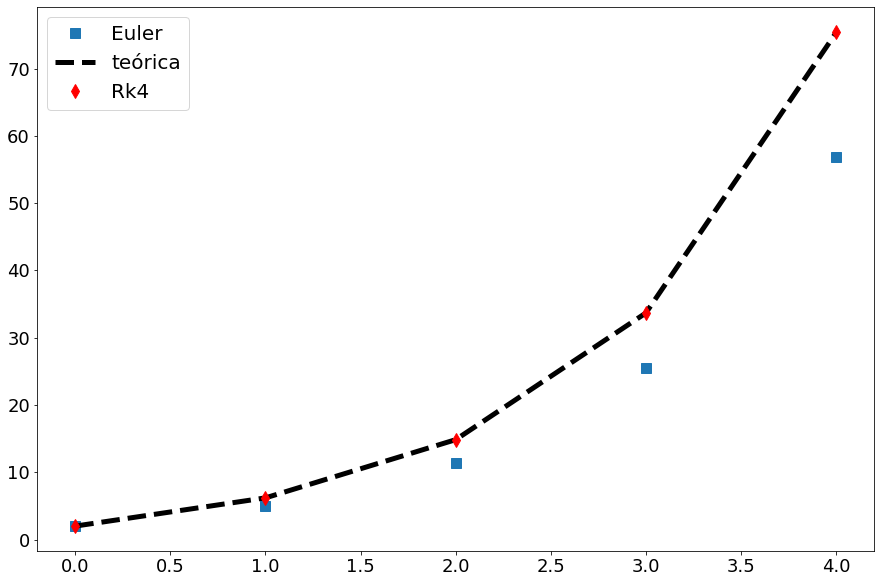

In [15]:
plt.plot(xeu, yeu, 's', label='Euler')
plt.plot(xeu,teo(xeu),'--k', label='teórica')
plt.plot(Xrk, yrk, 'dr', label='Rk4')
plt.legend()

# Paso a paso

In [9]:
paso_euler(1, 2, 4, F)

21.81212969758046

In [10]:
paso_RK(1,2,4,F)

27.130309794522987

# Resuelvo por Euler.

In [11]:
X0 = 0
Y0 = 2
XF = 4
EU = []
XS = np.linspace(X0, XF,100)
dx = (XS.max() - XS.min() )/(len(XS)-1)

In [12]:
EU = [Y0]
EREU = [1]
for i in range(1, len(XS)):
    EU.append(
        paso_euler(dx, XS[i], EU[-1], F )
    )
    EREU.append(
        abs( (EU[-1]-EU[-2])/EU[-1] )
    )
    

[]

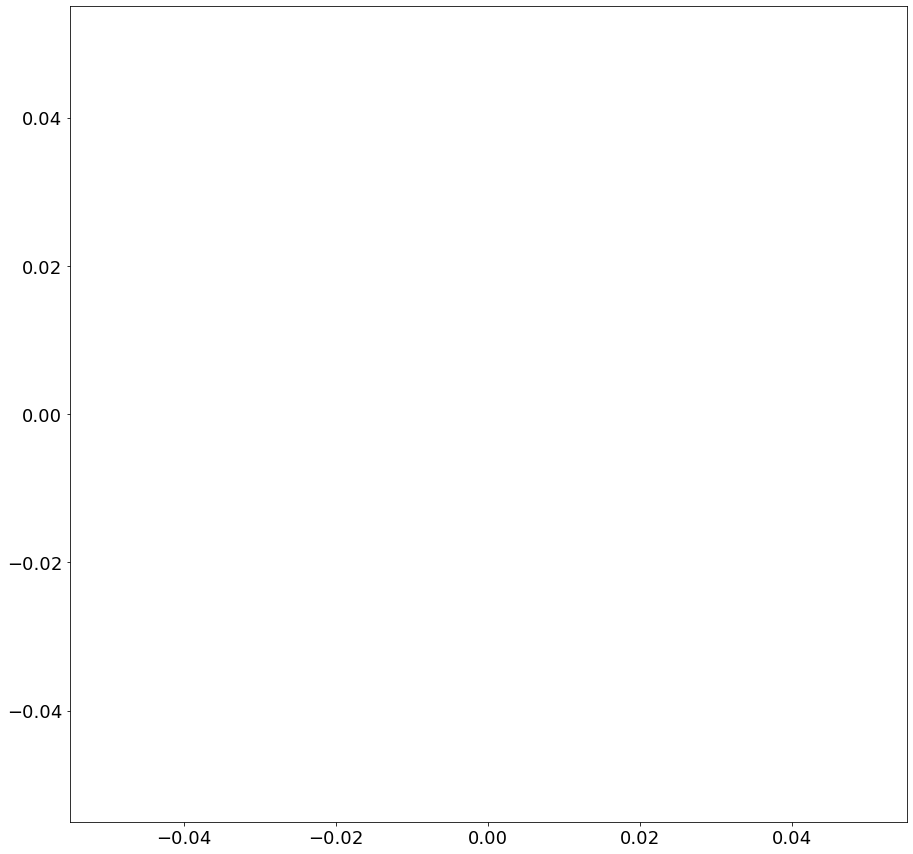

In [13]:
plt.plot()